In [7]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random 

def rargmax(vector):
    m = np.max(vector)
    indices = np.nonzero(vector==m)[0]
    return random.choice(indices)

**Deterministic vs Stochastic**

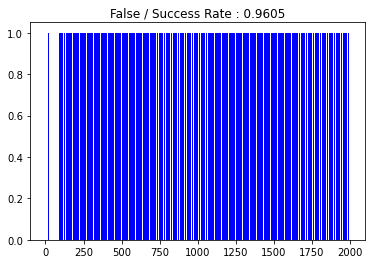

C:\Users\WorkStation\anaconda3\lib\site-packages\gym\envs\registration.py:595: UserWarning: WARN: Overriding environment FrozenLake-v3
  logger.warn(f"Overriding environment {id}")


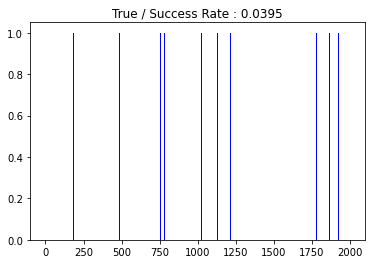

In [8]:
num_episodes = 2000
rList = []
alpha = 0.85
dis = 0.99

world_list = [False, True]

for w in world_list:
    rList = []
    register(
        id='FrozenLake-v3',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name':'4x4', 'is_slippery':w}
    )
    
    env = gym.make('FrozenLake-v3')
    Q = np.zeros([env.observation_space.n, env.action_space.n])   #16x4

    for i in range(num_episodes):
        state = env.reset() #초기 상태로 만들어놓기
        rAll = 0
        done = False

        while not done:
            action = rargmax(Q[state, :])
            #action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n) / (i+1))

            new_state, reward, done, info = env.step(action)
            if w == False:
                Q[state, action] = reward + np.max(Q[new_state, :]) 
            else:
                Q[state, action] = (1 - alpha)*Q[state, action] + alpha*(reward + dis*np.max(Q[new_state, :]))

            rAll += reward
            state = new_state

        rList.append(rAll)

    plt.title(f"{w} / Success Rate : {sum(rList)/num_episodes}")
    plt.bar(range(len(rList)), rList, color='blue')
    plt.show()

**[$Deterministic$ vs $Stochastic$] vs [$Exploit$ & $Exploration$]**

In [ ]:
num_episodes = 2000
dis = 0.99
lr = 0.85

rDict = {'Worlds':[],
         'Action':[],
         'rList':[],
         'rScore':[]}

world_list = [False, True]
action_list = ['Dummy', 'E-greedy', 'Add Random Noise']

for w in world_list:
    register(
        id='FrozenLake-v3',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name':'4x4', 'is_slippery':w}
    )
    
    env = gym.make('FrozenLake-v3') 

    for a in action_list:
        Q = np.zeros([env.observation_space.n, env.action_space.n])
        rList = []

        for i in range(num_episodes):
            state = env.reset() 
            rAll = 0
            done = False

            while not done:
                # === Action === #
                if a == 'E-greedy':
                    e = 0.1 / ((i//100)+1)  
                    action = env.action_space.sample() if np.random.rand(1)<e else rargmax(Q[state, :])
                elif a == 'Add Random Noise':
                    action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)/(i+1))
                else: action = rargmax(Q[state, :])
                
                new_state, reward, done, info = env.step(action)
              
                if w == False:
                    Q[state, action] = reward + np.max(Q[new_state, :])
                else:
                    Q[state, action] = (1 - alpha)*Q[state, action] + alpha*(reward + dis*np.max(Q[new_state, :]))            

                rAll += reward
                state = new_state

            rList.append(rAll)

        score = np.sum(rList)/num_episodes

        rDict['Worlds'].append(w)
        rDict['Action'].append(a)
        rDict['rList'].append(rList)
        rDict['rScore'].append(score)

        print(f"<{w} + {a}>")
        print(f"Success Rate : {score}\n")

C:\Users\WorkStation\anaconda3\lib\site-packages\gym\envs\registration.py:595: UserWarning: WARN: Overriding environment FrozenLake-v3
  logger.warn(f"Overriding environment {id}")


<False + Dummy>
Success Rate : 0.9625

<False + E-greedy>
Success Rate : 0.826

<False + Add Random Noise>
Success Rate : 0.956

<True + Dummy>
Success Rate : 0.0405

<True + E-greedy>
Success Rate : 0.3425

<True + Add Random Noise>
Success Rate : 0.581



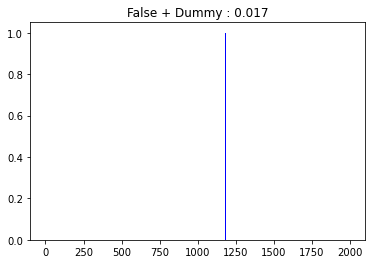

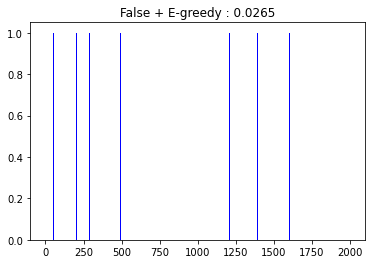

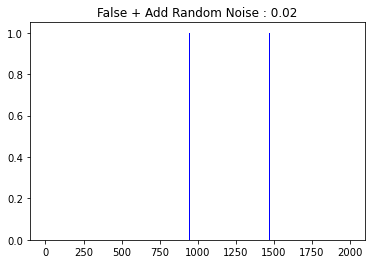

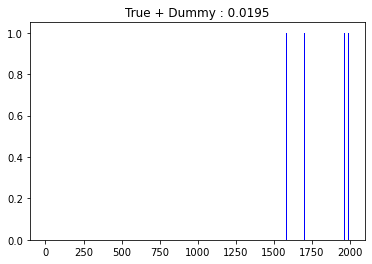

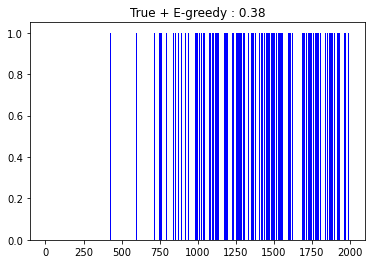

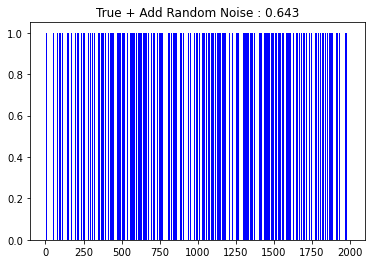

In [ ]:
for i in range(len(rDict['Action'])):
    plt.title(f"{rDict['Worlds'][i]} + {rDict['Action'][i]} : {np.sum(rDict['rList'][i])/num_episodes}")
    plt.bar(range(len(rDict['rList'][i])), rDict['rList'][i], color='blue')
    plt.show()